In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Notes:
- There are random 15 and 30 minute sections that have no rides recorded - probably due to the mean of 14 and standard deviation of 12 - but it does seem to be an anamoly to have two or three 15 minute periods in a row not recording, and 8% of all 15 minute intervals having 0 rides recorded.

In [2]:
df = pd.read_json('data/new-logins.json', convert_dates=True)

In [21]:
print len(df) 
print df.dtypes
print sum(df['login_time'].isnull())

97423
login_time     datetime64[ns]
day_of_week             int64
dtype: object
0


In [4]:
df['day_of_week'] = df['login_time'].dt.dayofweek

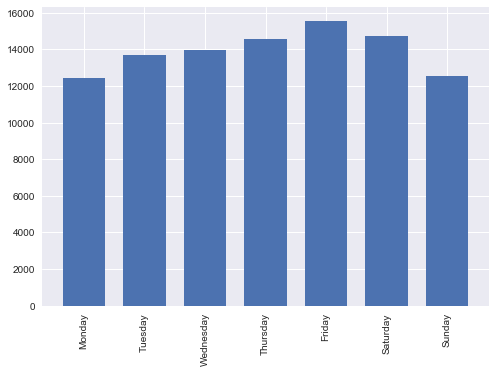

In [11]:
hist, bins = np.histogram(df['day_of_week'], bins=np.arange(8)-0.5)
labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xticks([0,1,2,3,4,5,6], labels, rotation='vertical')
plt.show()

In [29]:
grp = df.groupby(by=df['login_time'].map(lambda x: (x.hour, x.minute))).count()

In [71]:
df.index = df['login_time']
grp2 = df.groupby(pd.Grouper(freq='15Min')).aggregate('count')

In [73]:
# total number of 15 minute intervals with zero recordings
len(grp2[grp2['day_of_week'] == 0])/float(len(grp2))

0.08215962441314555

In [74]:
print len(grp2[grp2['day_of_week'].isnull() == True]), len(grp2[grp2['day_of_week']== 0])

0 1890


In [68]:
grp2[grp2['day_of_week'].isnull() == True][0:20]

,day_of_week
login_time,
2010-01-01 06:45:00,NaN
2010-01-01 07:00:00,NaN
2010-01-01 08:30:00,NaN
2010-01-01 09:45:00,NaN
2010-01-02 03:30:00,NaN
2010-01-02 03:45:00,NaN
2010-01-02 04:00:00,NaN
2010-01-02 04:30:00,NaN
2010-01-02 05:00:00,NaN


In [65]:
grp2[grp2['day_of_week']== 0][0:20]

,day_of_week
login_time,
2010-01-04 00:00:00,0.0
2010-01-04 00:15:00,0.0
2010-01-04 01:00:00,0.0
2010-01-04 01:15:00,0.0
2010-01-04 01:30:00,0.0
2010-01-04 02:00:00,0.0
2010-01-04 02:15:00,0.0
2010-01-04 02:45:00,0.0
2010-01-04 03:00:00,0.0
